This is a dataset comprised of various measurements of different penguin species.



## Basic Data Discovery



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Seaborn 'penguins' dataset

In [ ]:
# load the 'penguins' dataset from seaborn
dataset = sns.load_dataset('penguins')

### Check data head()

In [ ]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Check basic stats on the continuous variables using describe()

In [ ]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Check the dimensions of your dataset using shape().

In [ ]:
dataset.shape

(344, 7)

#### How many rows are in the dataset?

There are a total of **344** rows in the penguin dataset

### Check the column data types



In [ ]:
dataset.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Check for missing values

In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dataset)

,Total,Percent
sex,11,0.031977
bill_length_mm,2,0.005814
bill_depth_mm,2,0.005814
flipper_length_mm,2,0.005814
body_mass_g,2,0.005814
species,0,0.000000
island,0,0.000000


## Univariate Analysis

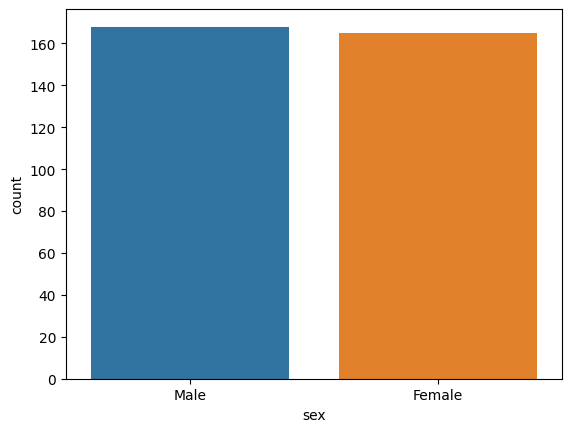

In [ ]:
# countplot
sns.countplot(data=dataset,x='sex')

# display the plot
plt.show()

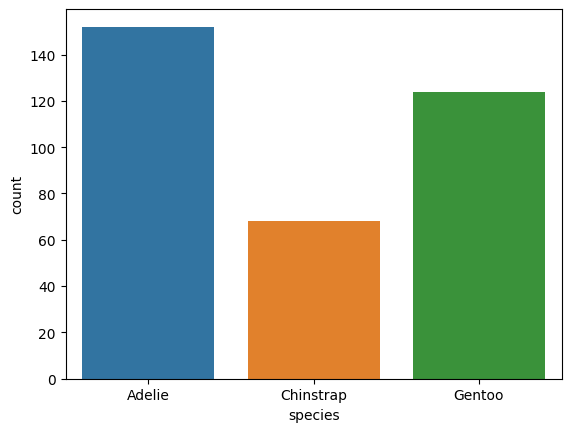

In [ ]:
# countplot
sns.countplot(data=dataset,x='species')
# display the plot
plt.show()

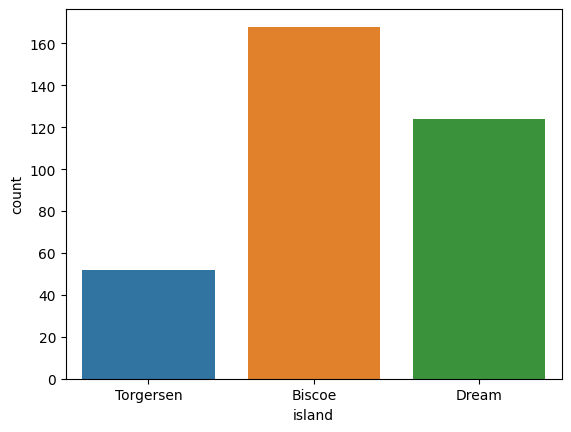

In [ ]:
# counplot
sns.countplot(data=dataset,x='island')

# display the plot
plt.show()

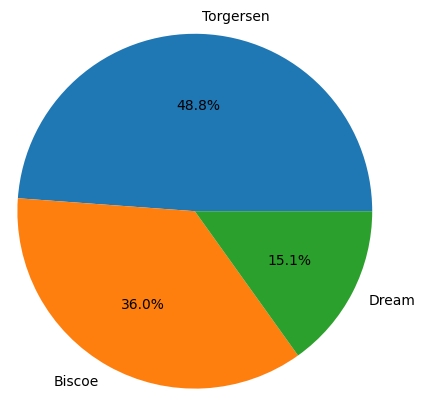

In [ ]:
# pie chart
plt.pie(dataset['island'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Torgersen','Biscoe','Dream'] )

# display the plot
plt.show()

Torgersen has the most records which is evident from above pie chart

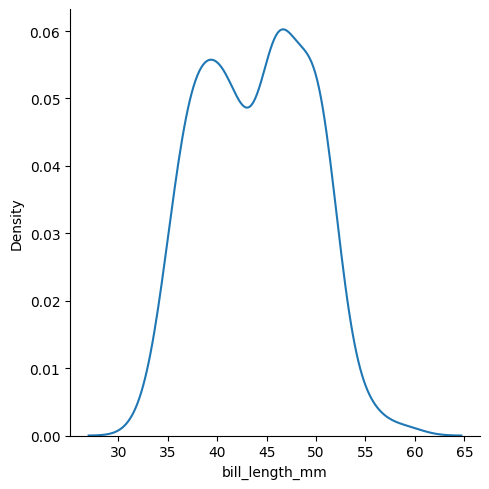

In [ ]:
# distribution plot
sns.displot(data=dataset['bill_length_mm'],kind='kde')
# display the plot
plt.show()

The bill length range is between 30-60.The density is at the peaks when the bill length is between 45 to 50

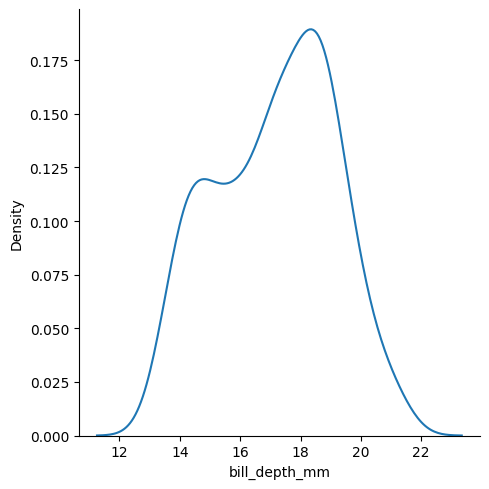

In [ ]:
# distribution plot
sns.displot(data=dataset['bill_depth_mm'],kind='kde')

# display the plot
plt.show()

Bill depth range is between 12 to 22.The density reached its peak value between 18-20.There was a steady incline in the density from 16 to 20.

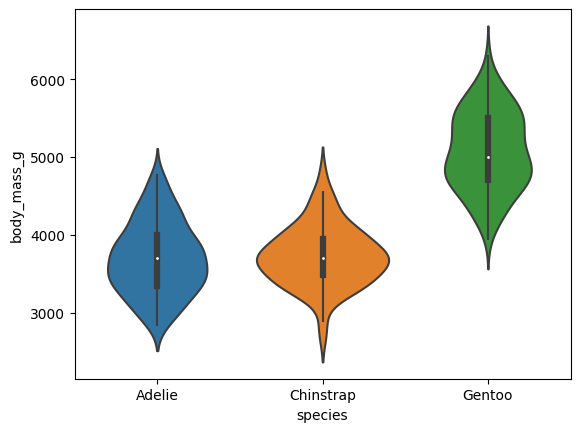

In [ ]:
# violin plot
sns.violinplot(data=dataset,x='species',y='body_mass_g')

# display the plot
plt.show()

## Multivariate Analysis

In [ ]:
corr_matrix = dataset.corr()

corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


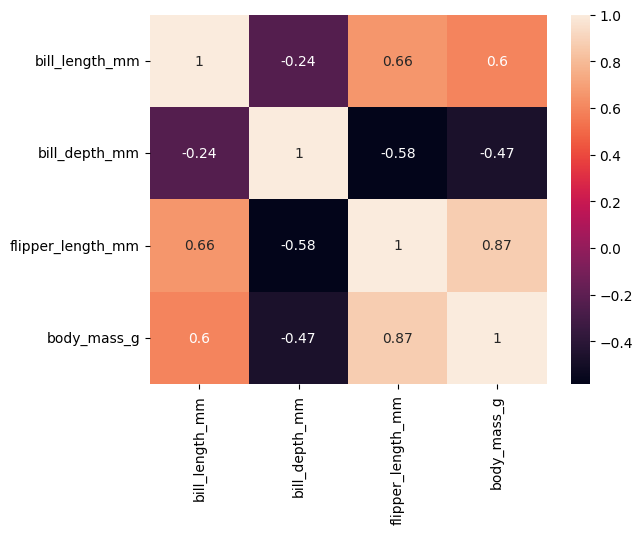

In [ ]:
# plot heatmap
# 'annot=True' returns the correlation values
sns.heatmap(corr_matrix,annot=True)

# display the plot
plt.show()

Body mass and flipper length for bill depth are negatively correlated where as these two parameters are correleated positively with bill length

## Bivariate Analysis

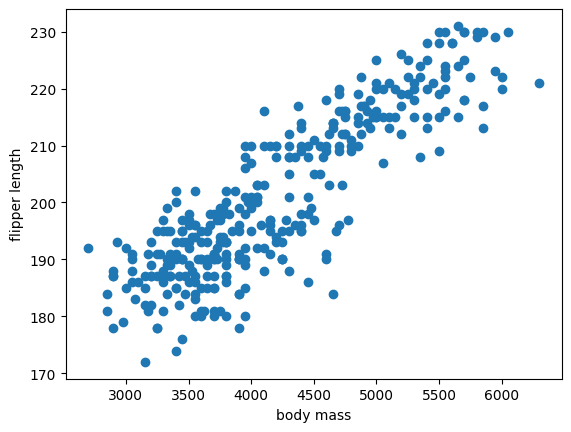

In [ ]:
# data
X = dataset['body_mass_g']
Y = dataset['flipper_length_mm']

# plot the scatter plot
plt.scatter(X,Y)

# add the axes labels to the plot
plt.xlabel('body mass')
plt.ylabel('flipper length')

# display the plot
plt.show()

In [ ]:
#dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

body mass and flipper length are correlated to each other

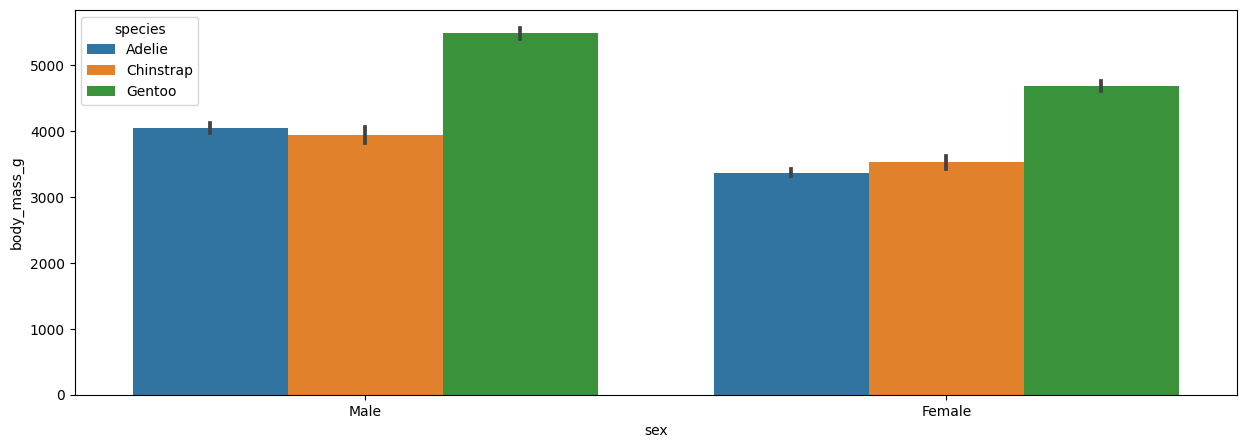

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='body_mass_g',x='sex',hue='species')
plt.show()

Female gentoo has more body mass (more than 5000) than Male adelie & chinstrap species which have roughly 4,000 population, the male-to-female ratio among Chinstrap penguins is quite similar.

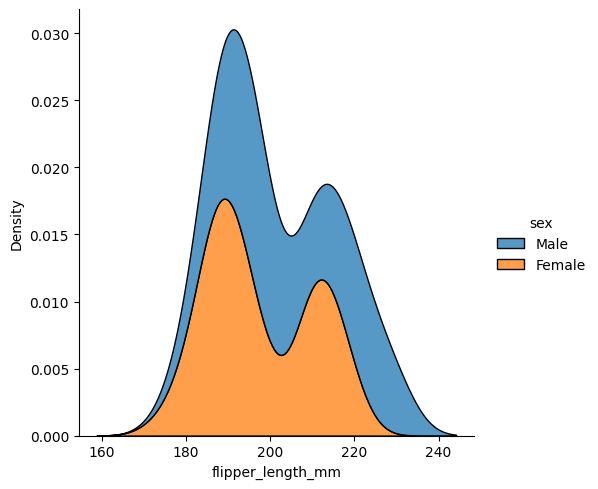

In [ ]:
sns.displot(data=dataset,x='flipper_length_mm',hue='sex',kind='kde', multiple= 'stack')

This shows that the male species have more flipper length than the female species and the density had steady incline between the flipper length value 180-200.

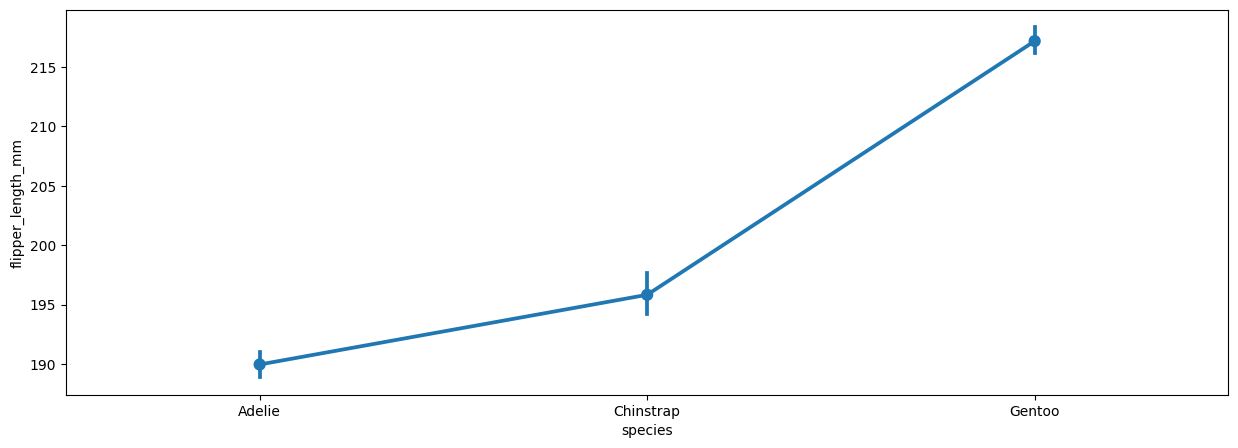

In [ ]:
plt.figure(figsize=(15,5))

sns.pointplot(data = dataset, x='species',y='flipper_length_mm')
plt.show()